In [8]:
#Imports
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

import seaborn as sns

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')


In [9]:
df = pd.read_csv("../data/kickstarter_projects.csv")
df.head()


# Convert all column names to lower case
df.columns = df.columns.str.lower()

# Count the number of unique values for each column
unique_counts = df.nunique()

df.columns.value_counts
df.nunique()

id             374853
name           372061
category           15
subcategory       159
country            22
launched       374297
deadline         3164
goal            27692
pledged         39989
backers          3963
state               5
dtype: int64

In [10]:
df.head()

df.isna().value_counts()
#


id     name   category  subcategory  country  launched  deadline  goal   pledged  backers  state
False  False  False     False        False    False     False     False  False    False    False    374853
Name: count, dtype: int64

In [11]:
df_clean=df

# Convert appropriate columns to correct data types
df_clean['launched'] = pd.to_datetime(df_clean['launched'], errors='coerce')
df_clean['deadline'] = pd.to_datetime(df_clean['deadline'], errors='coerce')
df_clean['goal'] = pd.to_numeric(df['goal'], errors='coerce')
df_clean['pledged'] = pd.to_numeric(df_clean['pledged'], errors='coerce')
df_clean['backers'] = pd.to_numeric(df_clean['backers'], errors='coerce')


# Recalculate pledge_ratio and pledge_backer ratio
df_clean['pledge_ratio'] = df_clean['pledged'] / df_clean['goal']
df_clean['ave_backer'] = df_clean['pledged'] / df_clean['backers']
df_clean['backer_ratio_on_goal'] = (df_clean['goal']*df_clean['backers']) / df_clean['pledged']


In [12]:
df_clean.head()


,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,pledge_ratio,ave_backer,backer_ratio_on_goal
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000,20.833333,48.000000
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275,7.333333,10909.090909
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000,11.666667,1.714286
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646,5.800000,17.068966
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684,38.700000,49.095607


In [13]:
print(df_clean.info())
df_clean.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    374853 non-null  int64         
 1   name                  374853 non-null  object        
 2   category              374853 non-null  object        
 3   subcategory           374853 non-null  object        
 4   country               374853 non-null  object        
 5   launched              374853 non-null  datetime64[ns]
 6   deadline              374853 non-null  datetime64[ns]
 7   goal                  374853 non-null  int64         
 8   pledged               374853 non-null  int64         
 9   backers               374853 non-null  int64         
 10  state                 374853 non-null  object        
 11  pledge_ratio          374851 non-null  float64       
 12  ave_backer            323052 non-null  float64       
 13 

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,pledge_ratio,ave_backer,backer_ratio_on_goal
count,3.748530e+05,374853,374853,374853,374853,374853,374853,3.748530e+05,3.748530e+05,374853.000000,374853,3.748510e+05,3.230520e+05,3.230520e+05
unique,NaN,372061,15,159,22,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,New EP/Music Development,Film & Video,Product Design,United States,NaN,NaN,NaN,NaN,NaN,Failed,NaN,NaN,NaN
freq,NaN,13,62694,22310,292618,NaN,NaN,NaN,NaN,NaN,197611,NaN,NaN,NaN
mean,1.074656e+09,NaN,NaN,NaN,NaN,2014-09-26 12:22:30.728664320,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359,NaN,inf,inf,inf
min,5.971000e+03,NaN,NaN,NaN,NaN,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.380728e+08,NaN,NaN,NaN,NaN,2013-04-30 22:06:24,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000,NaN,4.566438e-03,2.533333e+01,4.235958e+01
50%,1.075300e+09,NaN,NaN,NaN,NaN,2014-12-02 19:02:35,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000,NaN,1.342857e-01,4.847059e+01,1.122973e+02
75%,1.610149e+09,NaN,NaN,NaN,NaN,2016-03-29 19:50:49,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000,NaN,1.065250e+00,8.444778e+01,3.407046e+02
max,2.147476e+09,NaN,NaN,NaN,NaN,2018-01-02 15:02:31,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000,NaN,inf,inf,inf


In [14]:
df_clean.isnull().sum()

id                          0
name                        0
category                    0
subcategory                 0
country                     0
launched                    0
deadline                    0
goal                        0
pledged                     0
backers                     0
state                       0
pledge_ratio                2
ave_backer              51801
backer_ratio_on_goal    51801
dtype: int64

In [15]:
df_clean[df_clean['pledge_ratio'].isna()]

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,pledge_ratio,ave_backer,backer_ratio_on_goal
33831,688564643,"Word-of-mouth publishing: get ""Corruptions"" ou...",Publishing,Fiction,United States,2011-11-07 16:46:52,2011-12-13,0,0,0,Canceled,NaN,NaN,NaN
40294,9572984,Nana,Film & Video,Shorts,United States,2012-01-25 07:23:19,2012-03-16,0,0,0,Failed,NaN,NaN,NaN


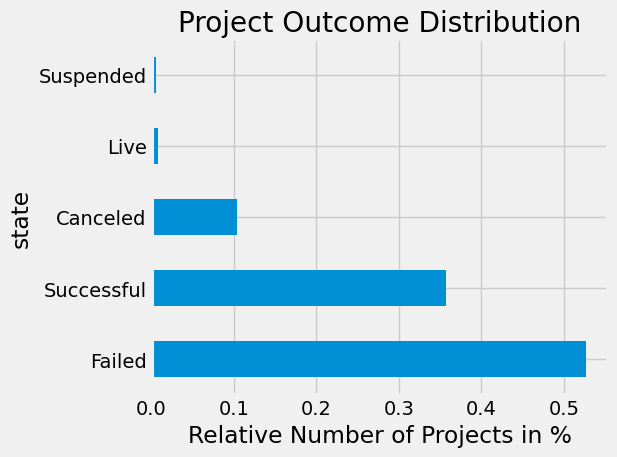

In [16]:
ax = df_clean['state'].value_counts(normalize=True).plot(kind='barh', title='Project Outcome Distribution')

# Add x-axis label
ax.set_xlabel('Relative Number of Projects in %')

plt.tight_layout()
plt.show()

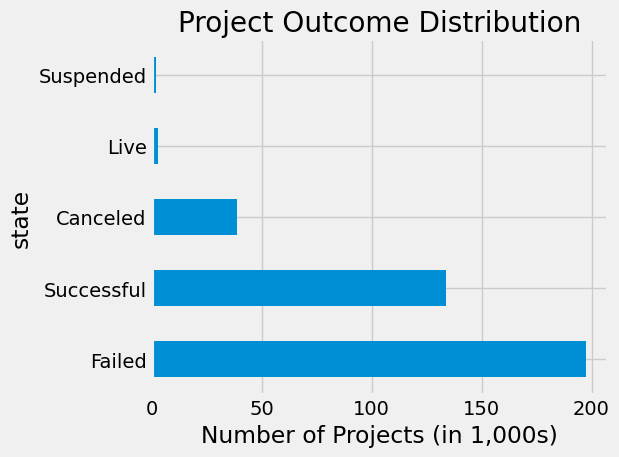

In [17]:

ax = df_clean['state'].value_counts(normalize=False).plot(
    kind='barh',
    title='Project Outcome Distribution'
    )

# Set custom ticks manually
max_value = df_clean['state'].value_counts().max()
ticks = list(range(0, max_value + 50000, 50000))
labels = [str(int(t / 1000)) for t in ticks]

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Add x-axis label
ax.set_xlabel('Number of Projects (in 1,000s)')

plt.tight_layout()
plt.show()

ValueError: supplied range of [0.0, inf] is not finite

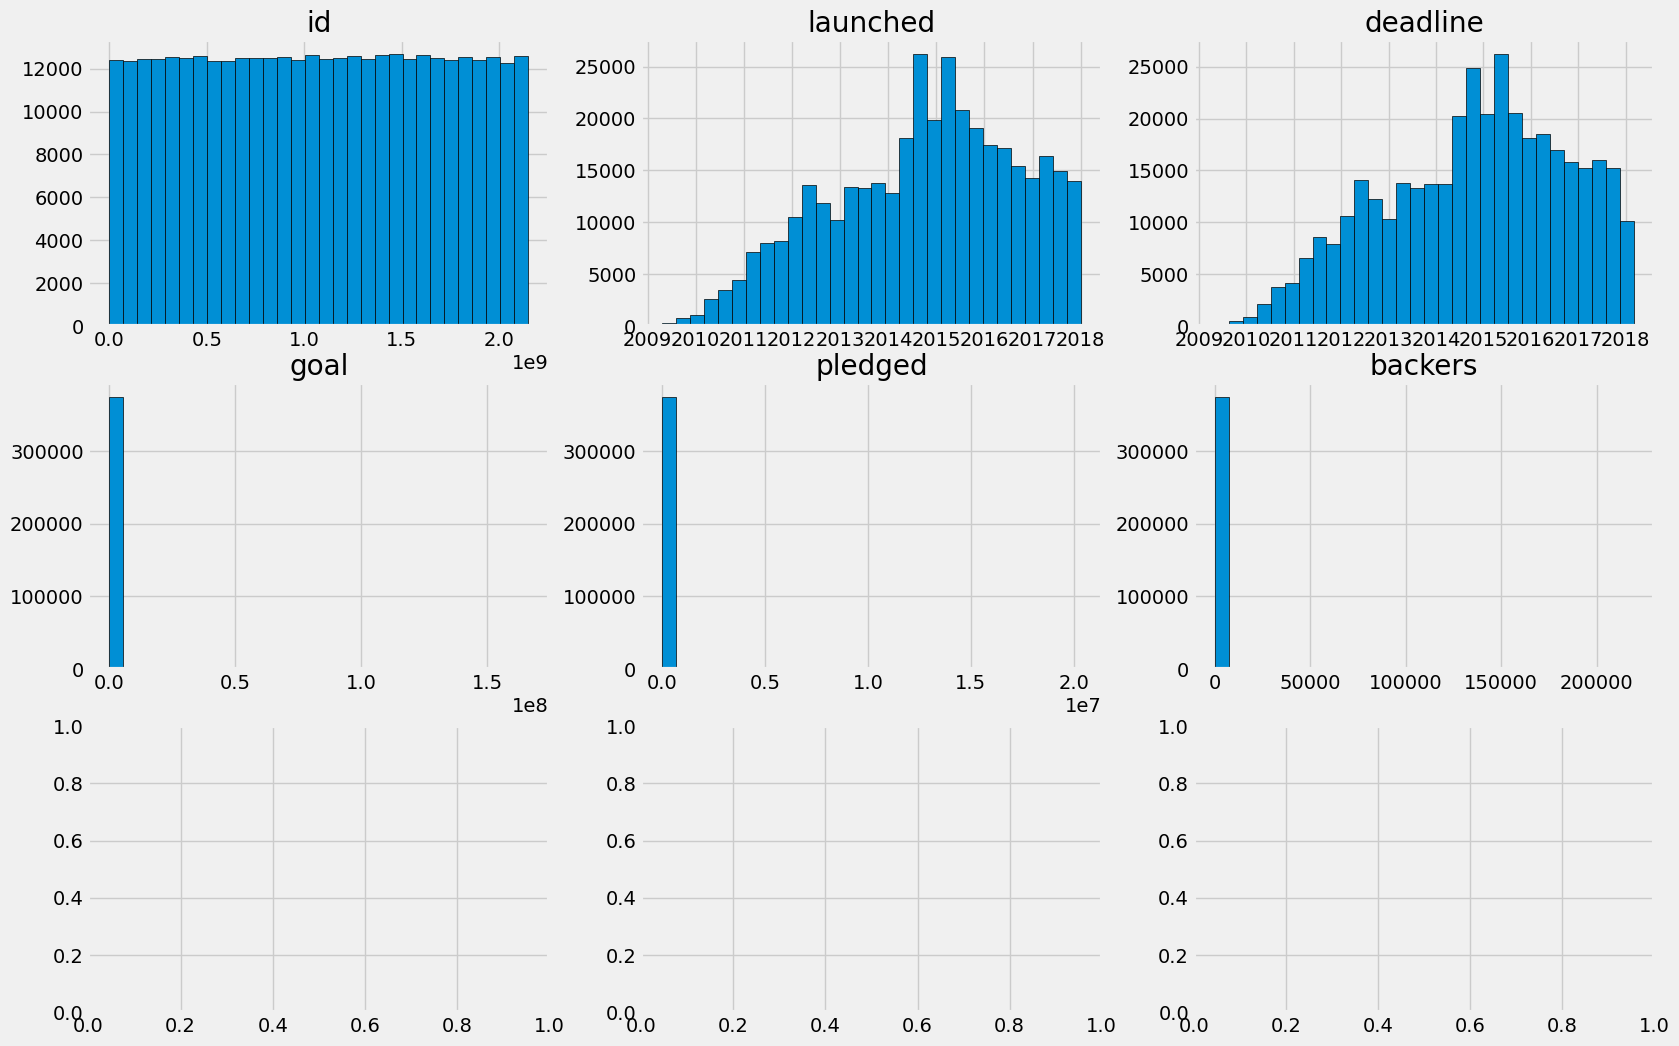

In [18]:
# Select only numeric columns for histogram
numeric_cols = df_clean.select_dtypes(include=['number', 'datetime']).columns

# Drop columns with too many NaNs if necessary (optional)
# numeric_cols = [col for col in numeric_cols if df_clean[col].notna().sum() > 10]

# Plot histograms
df_clean[numeric_cols].hist(bins=30, figsize=(18, 12), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df_clean.columns

Index(['id', 'name', 'category', 'subcategory', 'country', 'launched',
       'deadline', 'goal', 'pledged', 'backers', 'state', 'pledge_ratio',
       'ave_backer', 'backer_ratio_on_goal', 'duration_days', 'launch_month',
       'goal_bin'],
      dtype='object')

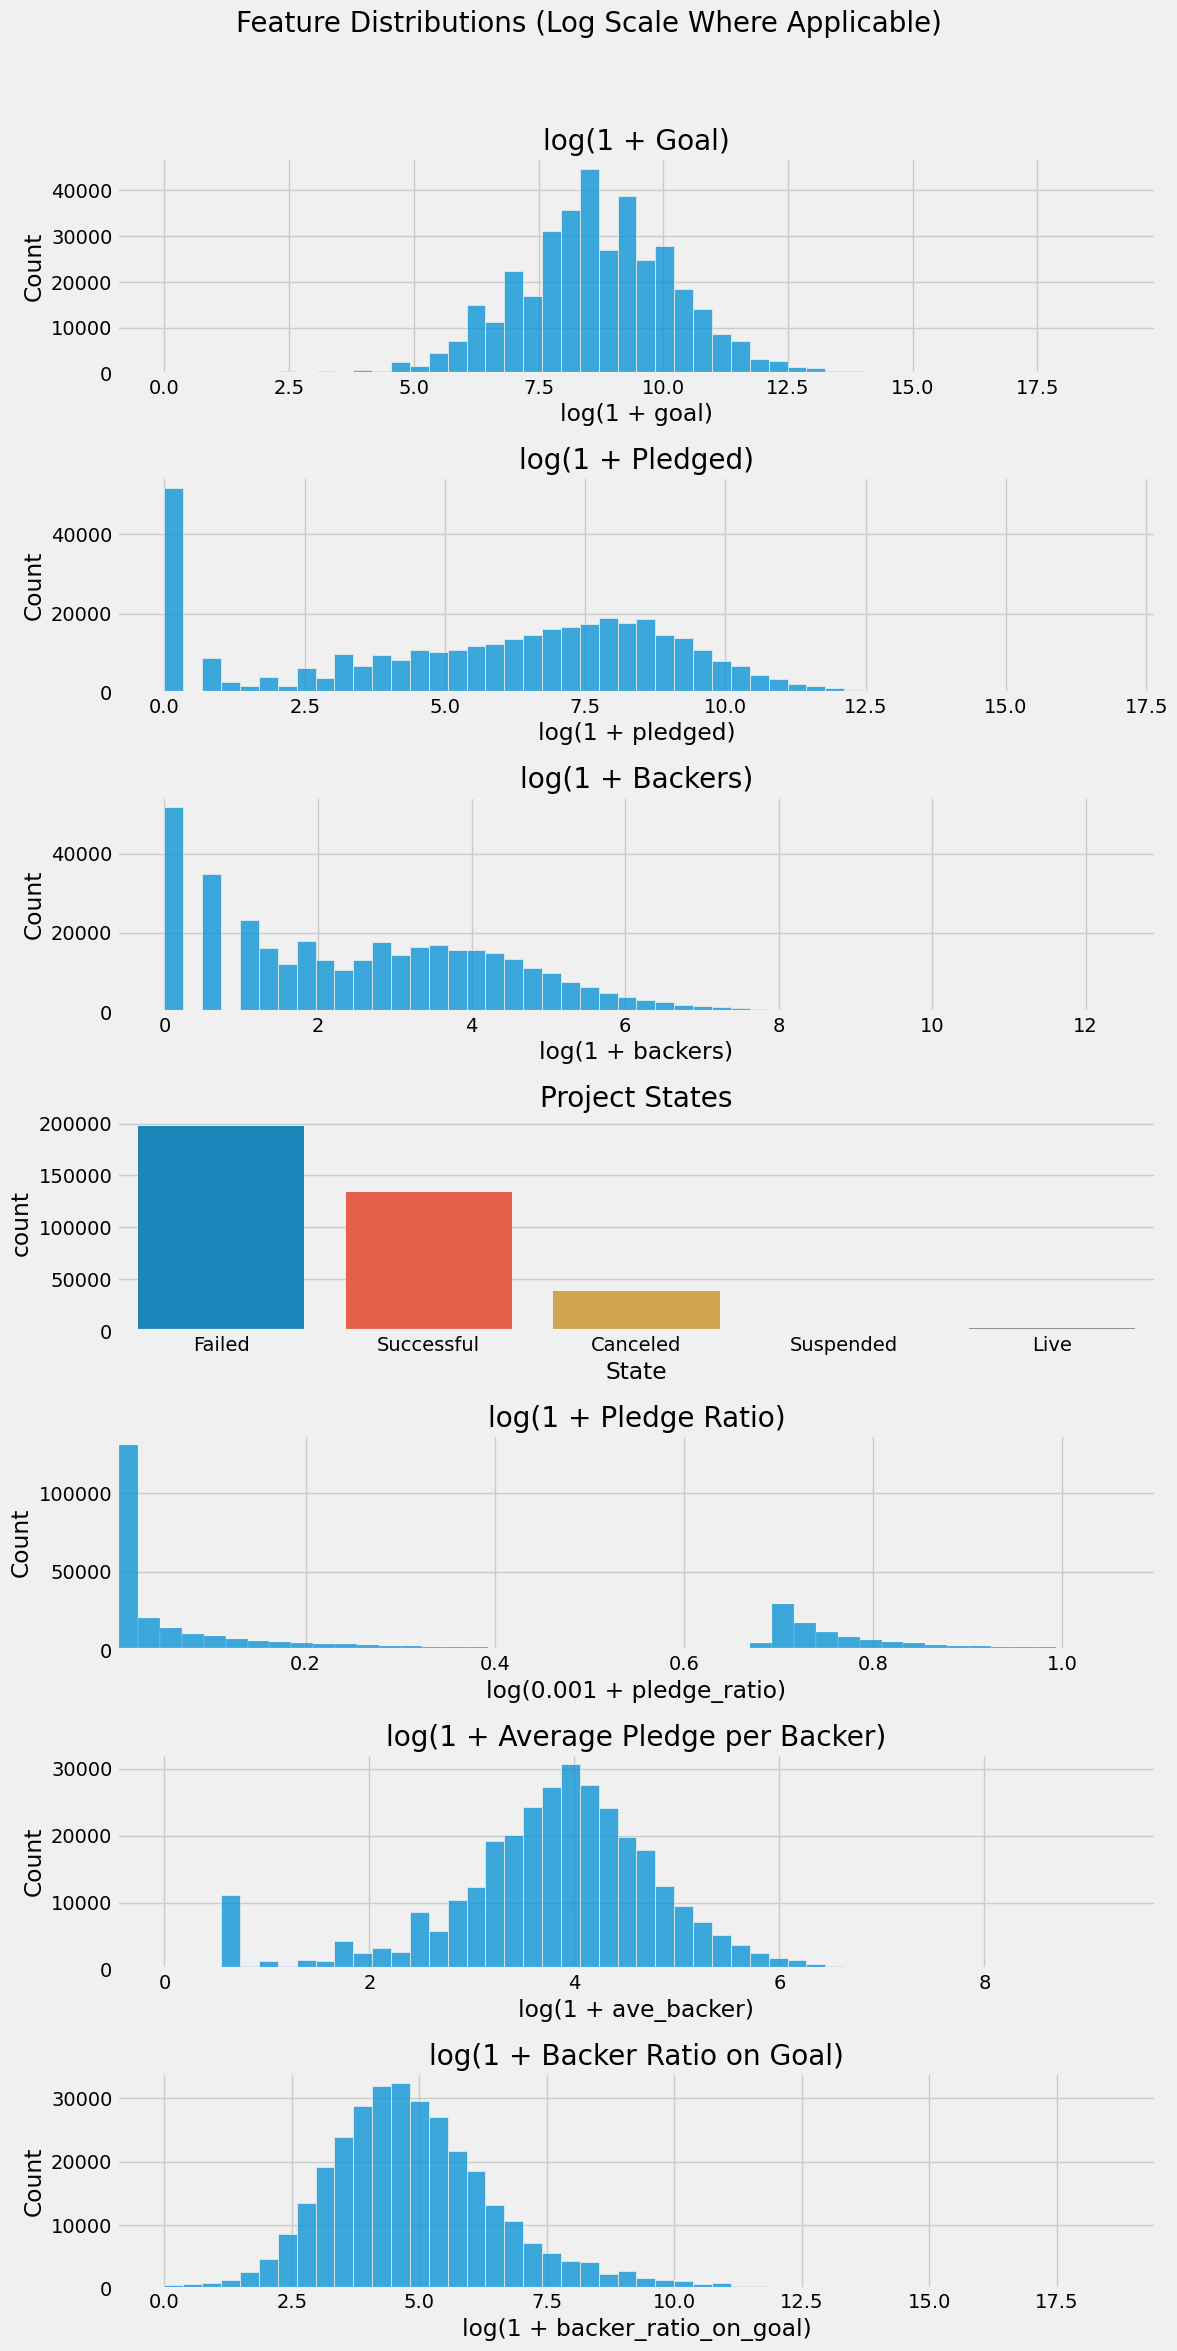

In [ ]:
# Set up a vertical stack of 7 plots
fig, axs = plt.subplots(7, 1, figsize=(12, 24))
fig.suptitle("Feature Distributions (Log Scale Where Applicable)", fontsize=20)

# Plot 1: goal
sns.histplot(np.log1p(df_clean['goal']), bins=50, ax=axs[0])
axs[0].set_title('log(1 + Goal)')
axs[0].set_xlabel('log(1 + goal)')

# Plot 2: pledged
sns.histplot(np.log1p(df_clean['pledged']), bins=50, ax=axs[1])
axs[1].set_title('log(1 + Pledged)')
axs[1].set_xlabel('log(1 + pledged)')

# Plot 3: backers
sns.histplot(np.log1p(df_clean['backers']), bins=50, ax=axs[2])
axs[2].set_title('log(1 + Backers)')
axs[2].set_xlabel('log(1 + backers)')

# Plot 4: state (categorical count)
sns.countplot(x='state', data=df_clean, ax=axs[3])
axs[3].set_title('Project States')
axs[3].set_xlabel('State')

# Plot 5: pledge_ratio
sns.histplot(np.log1p(df_clean['pledge_ratio']), bins=500, ax=axs[4])
axs[4].set_title('log(1 + Pledge Ratio)')
axs[4].set_xlabel('log(0.001 + pledge_ratio)')
axs[4].set_xlim(left=1e-3, right=np.log1p(2.0))

# Plot 6: ave_backer
sns.histplot(np.log1p(df_clean['ave_backer']), bins=50, ax=axs[5])
axs[5].set_title('log(1 + Average Pledge per Backer)')
axs[5].set_xlabel('log(1 + ave_backer)')

# Plot 7: backer_ratio_on_goal
sns.histplot(np.log1p(df_clean['backer_ratio_on_goal']), bins=50, ax=axs[6])
axs[6].set_title('log(1 + Backer Ratio on Goal)')
axs[6].set_xlabel('log(1 + backer_ratio_on_goal)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



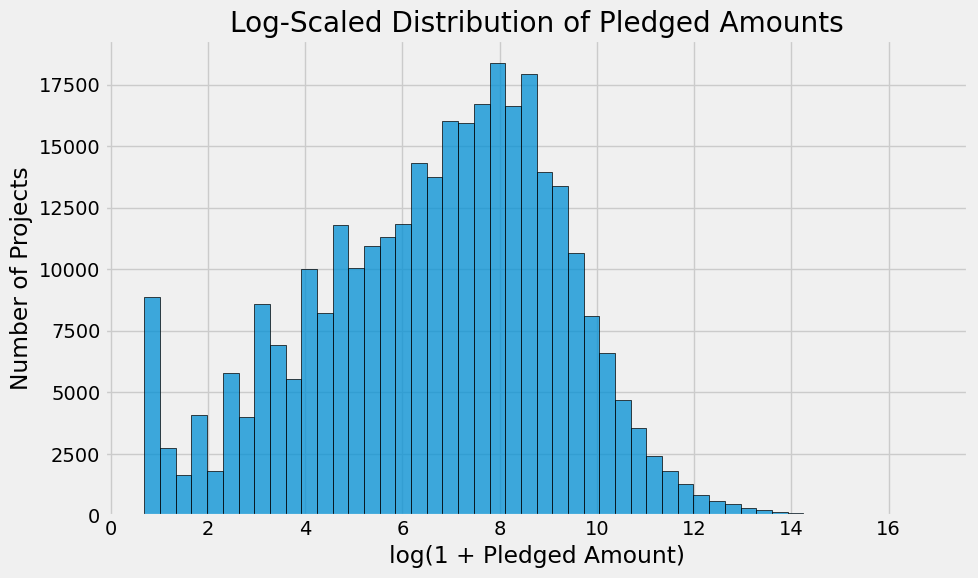

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_clean['pledged']), bins=50, edgecolor='black')
plt.title("Log-Scaled Distribution of Pledged Amounts")
plt.xlabel("log(1 + Pledged Amount)")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

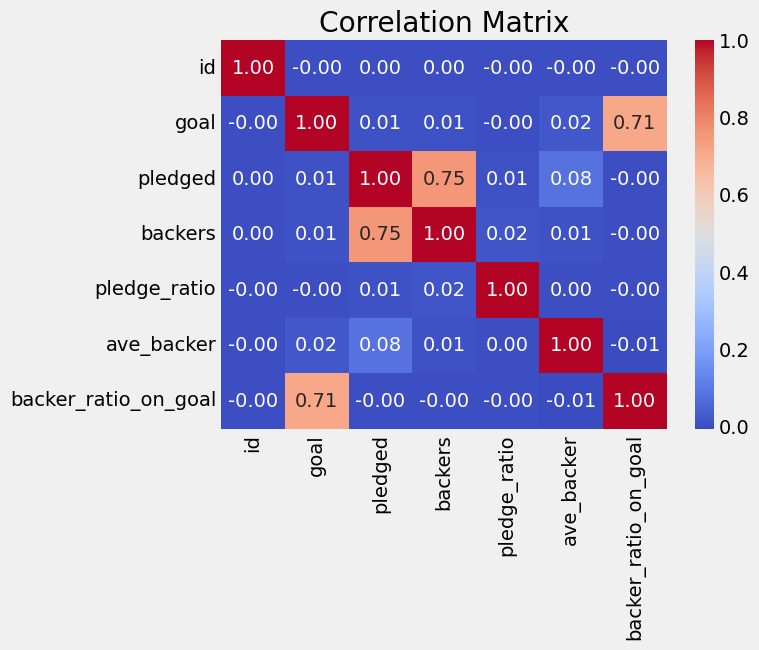

In [ ]:
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

#pledged# is highl correlated with "backers" - so, what is the typical average pledge per baker ? I calculated this. And then also the backer ratio on goal... to see, whether higher goals are resulting on higher pledges...

In [ ]:
df_clean.head()

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,pledge_ratio,ave_backer,backer_ratio_on_goal
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000,20.833333,48.000000
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275,7.333333,10909.090909
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000,11.666667,1.714286
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646,5.800000,17.068966
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684,38.700000,49.095607


In [ ]:
#df_clean = df_clean[df_clean['state'].notna()]

#sns.pairplot(df_clean[['goal', 'pledged', 'backers', 'pledge_ratio', 'ave_backer', 'state']], hue='state')
#plt.suptitle("Pairplot by Project State", y=1.02)

Text(0.5, 1.0, 'Feature Medians by Project State')

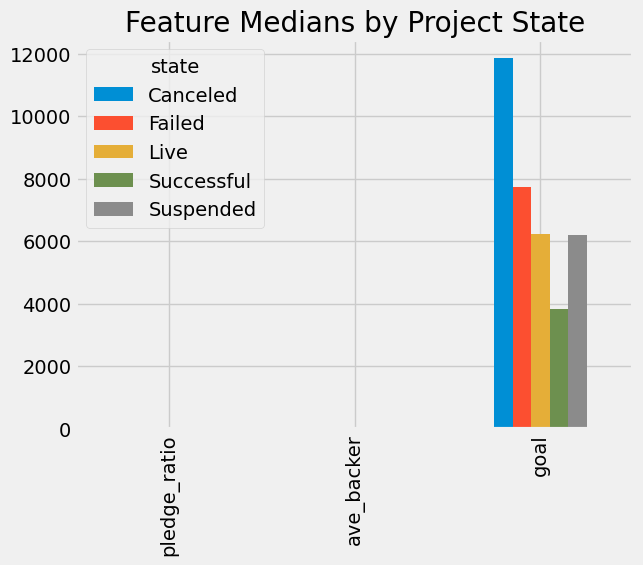

In [ ]:
df_clean.groupby('state')[['pledge_ratio', 'ave_backer', 'goal']].median().T.plot(kind='bar')
plt.title("Feature Medians by Project State")

<Axes: xlabel='state'>

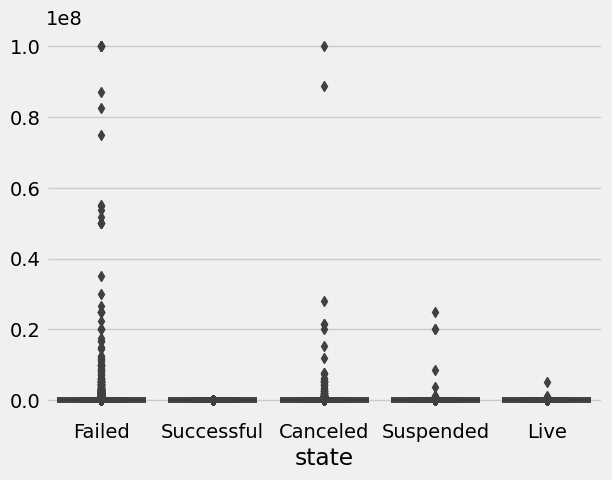

In [ ]:
sns.boxplot(x='state', y=(df_clean['goal']/df_clean['backers']), data=df_clean)


<Axes: xlabel='state', ylabel='backers'>

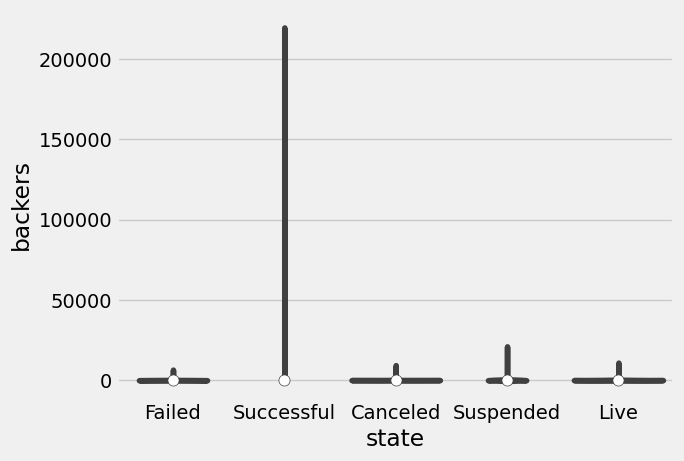

In [ ]:
sns.violinplot(x='state', y='backers', data=df_clean)

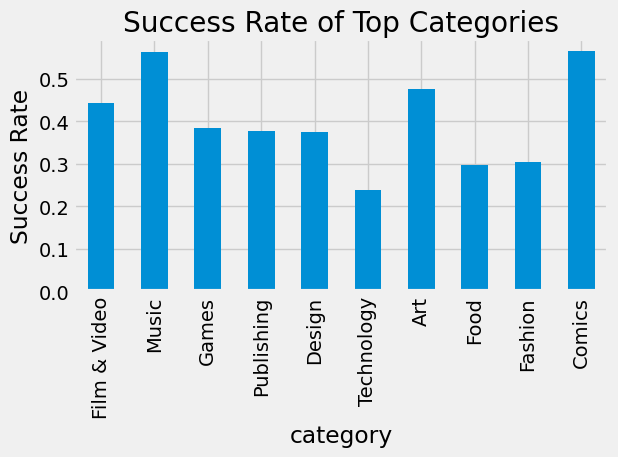

In [ ]:
top_cats = df_clean['category'].value_counts().head(10)
success_counts = df_clean[df_clean['state'] == 'Successful']['category'].value_counts()

# Reindex success_counts to align with top_cats
success_rate = success_counts.reindex(top_cats.index) / top_cats

# Plot the success rates
success_rate.plot(kind='bar', title='Success Rate of Top Categories')
plt.ylabel("Success Rate")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Success Rate by Country'}, xlabel='country', ylabel='duration_days'>

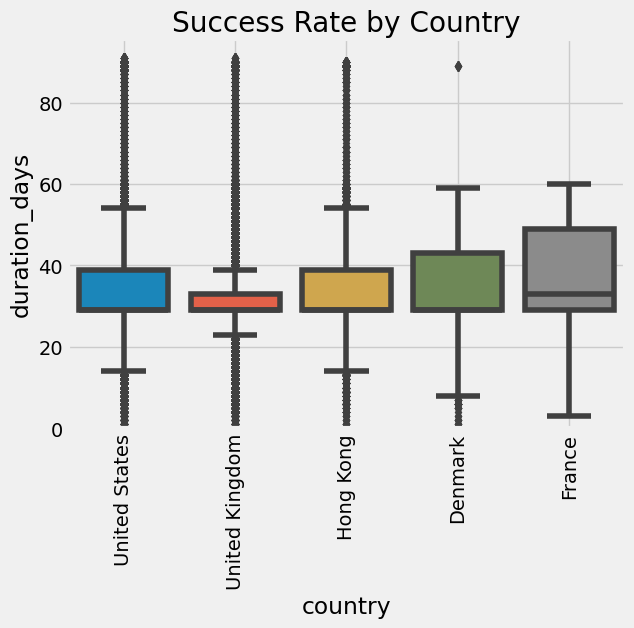

In [ ]:
df_clean['duration_days'] = (df_clean['deadline'] - df_clean['launched']).dt.days
sns.boxplot(x='state', y='duration_days', data=df_clean)
country_success = df_clean[df_clean['state'] == 'Successful']['country'].value_counts()
country_total = df_clean['country'].value_counts()
(country_success / country_total).sort_values(ascending=False).head(5).plot(kind='bar', title='Success Rate by Country')


<Axes: title={'center': 'Projects Launched Over Time'}, xlabel='launch_month'>

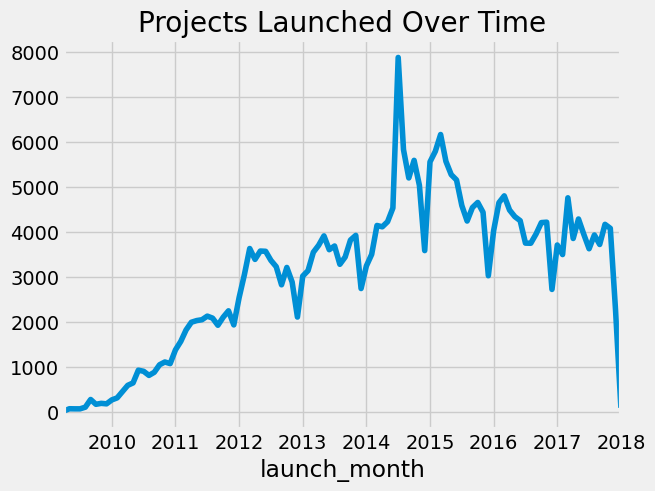

In [ ]:
df_clean['launch_month'] = df_clean['launched'].dt.to_period('M')
df_clean['launch_month'].value_counts().sort_index().plot(kind='line', title='Projects Launched Over Time')

In [ ]:
# Recreate launch_month just in case
df_clean['launch_month'] = pd.to_datetime(df_clean['launched'], errors='coerce').dt.to_period('M')

# Filter successful projects and drop NaNs
successful = df_clean[df_clean['state'] == 'successful'].copy()
successful = successful[successful['launch_month'].notna()]

# Count successful projects per month
success_per_month = successful['launch_month'].value_counts().sort_index()

# Only plot if data exists
if not success_per_month.empty:
    success_per_month.plot(kind='line', title='Successful Projects Over Time')
    plt.xlabel('Launch Month')
    plt.ylabel('Number of Successful Projects')
    plt.tight_layout()
    plt.show()
else:
    print("No successful projects with valid launch dates found.")

No successful projects with valid launch dates found.


<Axes: title={'center': 'Median Pledged/Goal by Category'}, xlabel='category'>

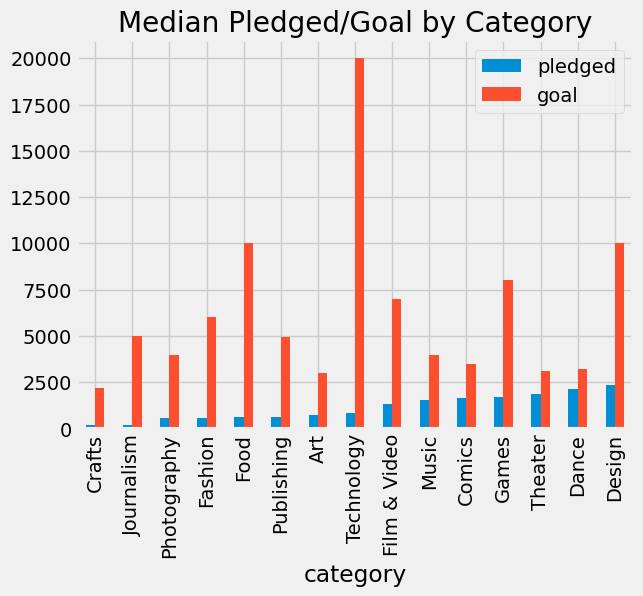

In [ ]:
df_clean.groupby('category')[['pledged', 'goal']].median().sort_values('pledged').plot(kind='bar', title='Median Pledged/Goal by Category')


<Axes: xlabel='state', ylabel='category'>

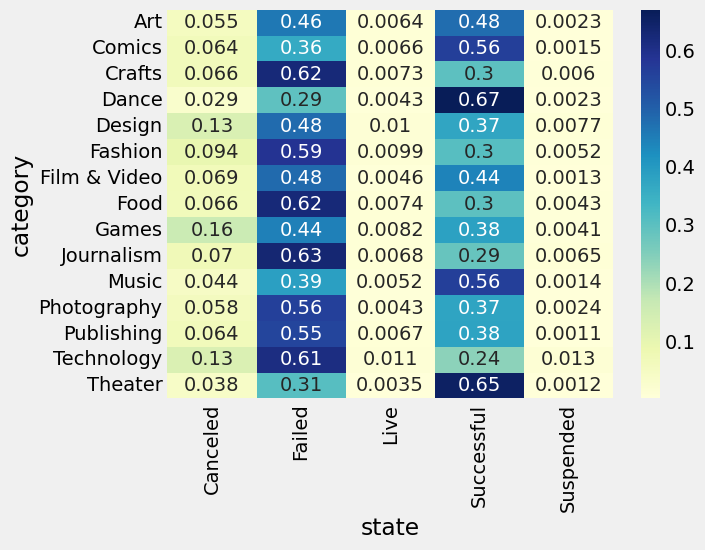

In [ ]:
pivot = pd.crosstab(df_clean['category'], df_clean['state'], normalize='index')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')

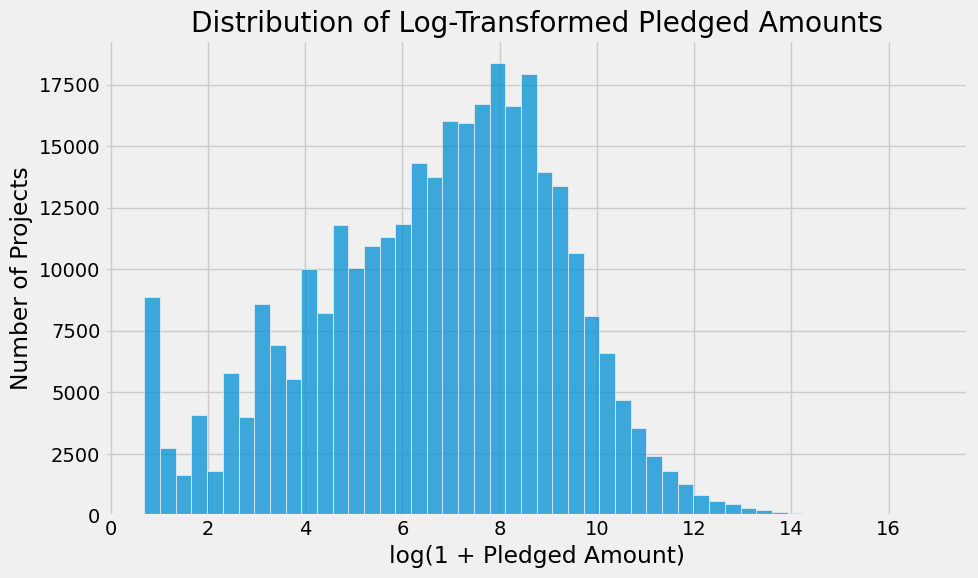

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_clean['pledged']), bins=50)
plt.title("Distribution of Log-Transformed Pledged Amounts")
plt.xlabel("log(1 + Pledged Amount)")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()

<Axes: xlabel='backers', ylabel='pledge_ratio'>

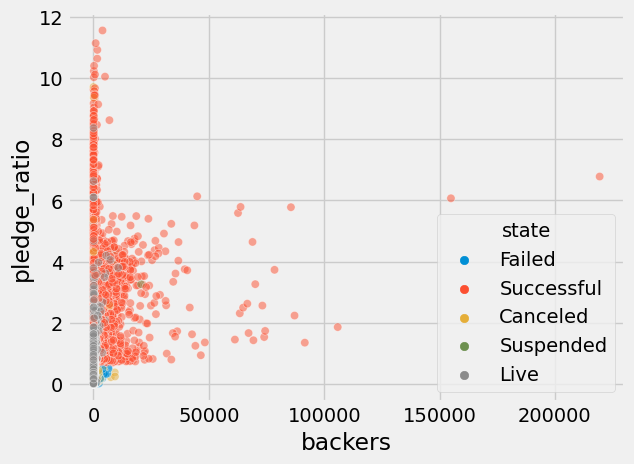

In [ ]:
sns.scatterplot(x='backers', y=np.log1p(df_clean['pledge_ratio']), hue='state', data=df_clean, alpha=0.5)


In [ ]:
# Define bins and labels
goal_bins = [0, 100, 1_000, 10_000, 100_000, 1_000_000, df_clean['goal'].max()]
goal_labels = ['<100', '100-1k', '1k–10k', '10k–100k', '100k–1M', '>1M']

# Create new column
df_clean['goal_bin'] = pd.cut(df_clean['goal'], bins=goal_bins, labels=goal_labels, include_lowest=True)
sns.countplot(data=df_clean, x='goal_bin', hue='state')
plt.title("Project Outcomes by Goal Range")
plt.xlabel("Goal Range (log steps)")
plt.ylabel("Number of Projects")
plt.tight_layout()
plt.show()

NameError: name 'df_clean' is not defined

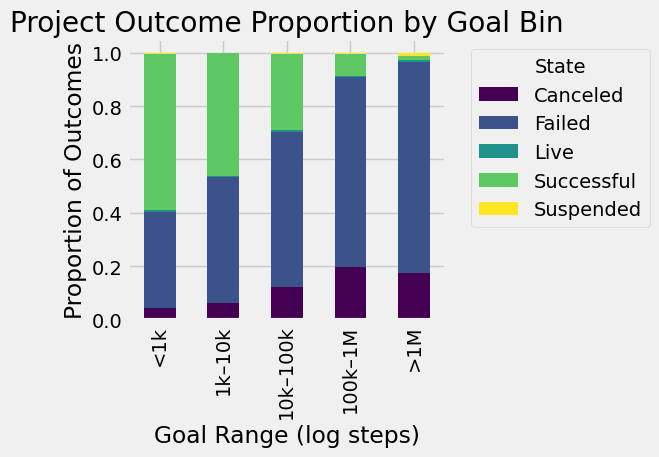

In [ ]:
# Cross-tab and normalize
goal_state_dist = pd.crosstab(df_clean['goal_bin'], df_clean['state'], normalize='index')

# Plot as stacked bar
goal_state_dist.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Project Outcome Proportion by Goal Bin")
plt.xlabel("Goal Range (log steps)")
plt.ylabel("Proportion of Outcomes")
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

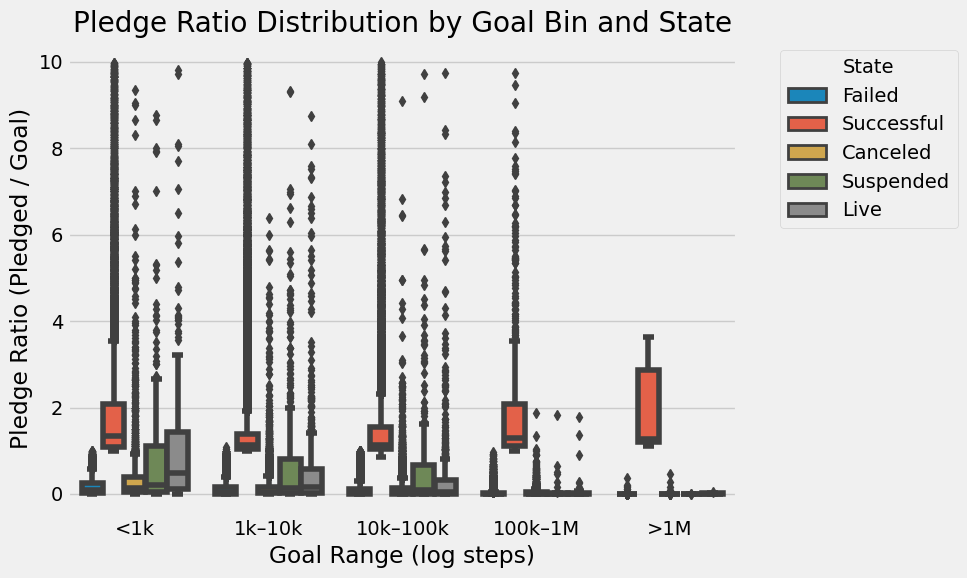

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define log-scaled goal bins
goal_bins = [0, 1_000, 10_000, 100_000, 1_000_000, df_clean['goal'].max()]
goal_labels = ['<1k', '1k–10k', '10k–100k', '100k–1M', '>1M']

# Create the binned column (if not already created)
df_clean['goal_bin'] = pd.cut(df_clean['goal'], bins=goal_bins, labels=goal_labels, include_lowest=True)

# Remove NaNs and extreme pledge_ratio outliers (optional but recommended)
df_box = df_clean[df_clean['pledge_ratio'].notna() & df_clean['goal_bin'].notna()]
df_box = df_box[df_box['pledge_ratio'] < 10]  # Filter for visibility

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box, x='goal_bin', y='pledge_ratio', hue='state')
plt.title('Pledge Ratio Distribution by Goal Bin and State')
plt.xlabel('Goal Range (log steps)')
plt.ylabel('Pledge Ratio (Pledged / Goal)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

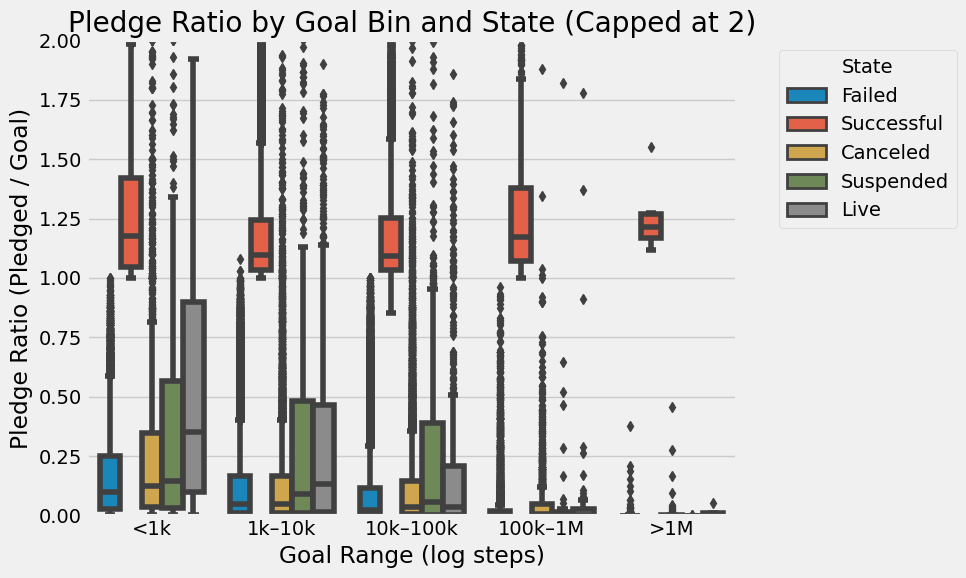

In [ ]:
df_box = df_clean[df_clean['pledge_ratio'].notna() & df_clean['goal_bin'].notna()]
df_box = df_box[df_box['pledge_ratio'] <= 2]

# Define goal bins
goal_bins = [0, 1_000, 10_000, 100_000, 1_000_000, df_clean['goal'].max()]
goal_labels = ['<1k', '1k–10k', '10k–100k', '100k–1M', '>1M']
df_clean['goal_bin'] = pd.cut(df_clean['goal'], bins=goal_bins, labels=goal_labels, include_lowest=True)

# Filter data and outliers
df_box = df_clean[df_clean['pledge_ratio'].notna() & df_clean['goal_bin'].notna()]
df_box = df_box[df_box['pledge_ratio'] <= 2]

# Plot
plt.figure(figsize=(10, 6))
plt.ylim(0, 2)
sns.boxplot(data=df_box, x='goal_bin', y='pledge_ratio', hue='state')
plt.ylim(0, 2)
plt.title('Pledge Ratio by Goal Bin and State (Capped at 2)')
plt.xlabel('Goal Range (log steps)')
plt.ylabel('Pledge Ratio (Pledged / Goal)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

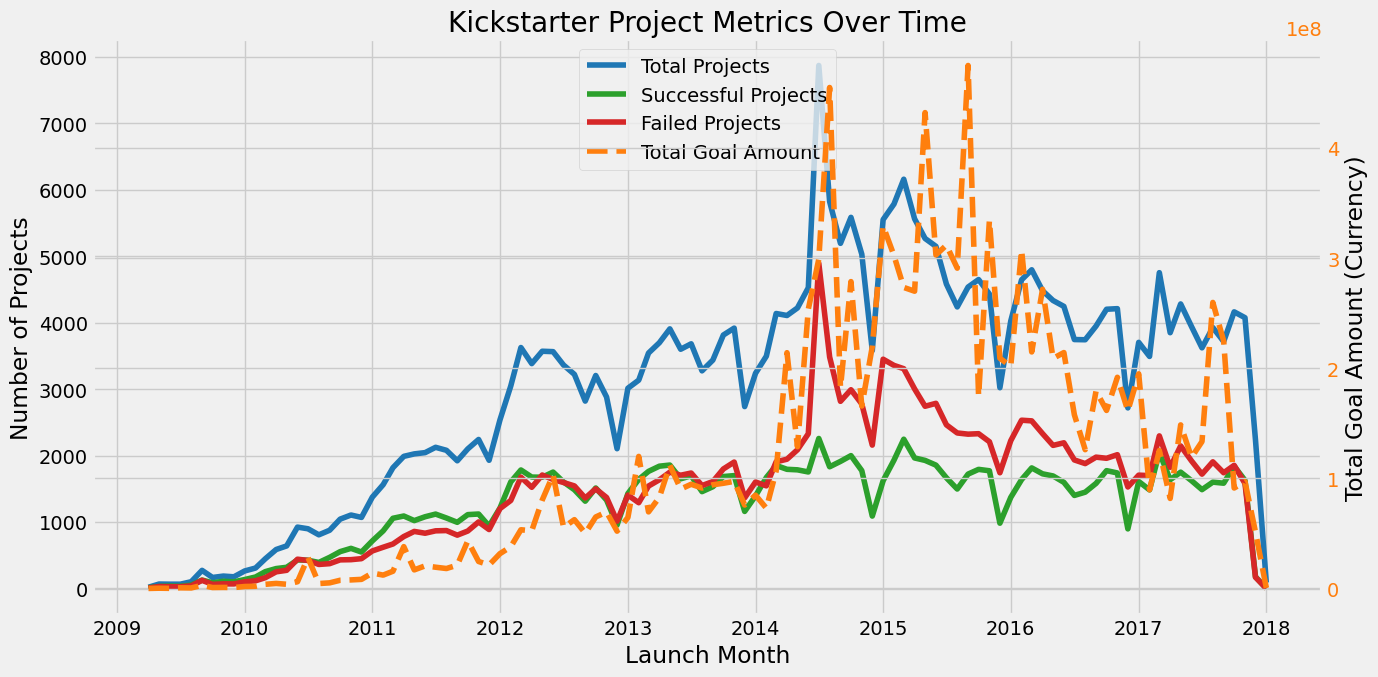

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'launch_month' is correct
df_clean['launch_month'] = pd.to_datetime(df_clean['launched'], errors='coerce').dt.to_period('M')

# Group by month
grouped = df_clean.groupby('launch_month')

# Metrics
total_projects = grouped.size()
total_goal = grouped['goal'].sum()
successful_projects = grouped['state'].apply(lambda x: (x == 'Successful').sum())
failed_projects = grouped['state'].apply(lambda x: (x == 'Failed').sum())

# Convert PeriodIndex to datetime for plotting
x = total_projects.index.to_timestamp()

# Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Left y-axis
ax1.plot(x, total_projects, label='Total Projects', color='tab:blue')
ax1.plot(x, successful_projects, label='Successful Projects', color='tab:green')
ax1.plot(x, failed_projects, label='Failed Projects', color='tab:red')
ax1.set_ylabel("Number of Projects")
ax1.set_xlabel("Launch Month")
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Right y-axis for total goal amount
ax2 = ax1.twinx()
ax2.plot(x, total_goal, label='Total Goal Amount', color='tab:orange', linestyle='--')
ax2.set_ylabel("Total Goal Amount (Currency)")
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.title("Kickstarter Project Metrics Over Time")
plt.tight_layout()
plt.show()

In [ ]:
###
#duration_days
#pledge_ratio
#ave_backer
#backer_ratio_on_goal
###